# SPAM DETECTION

In [10]:
#Libraries used
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import nltk
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


**DATA PREPROCESSING**

In [2]:
#Importing the data
df = pd.read_csv('spam.csv')
df.head(10)


,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
df.shape

(5572, 2)

In [4]:
#checking for missing values

df.isnull().sum()    #no missing values which is great!!

Label        0
EmailText    0
dtype: int64

In [5]:
#i'm checking if there are any duplicate lines
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate lines found:")
    print(duplicate_rows)
else:
    print("No duplicate lines found.")     #As we can see there are some duplicate lines and we need to remove them! 

Duplicate lines found:
     Label                                          EmailText
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]


In [6]:
#removing duplicate lines and only keeping the first ones
df = df.drop_duplicates(keep='first')

In [7]:
#checking if it worked
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate lines found:")
    print(duplicate_rows)
else:
    print("No duplicate lines found.")  #it did!!

No duplicate lines found.


In [8]:
df.shape

(5169, 2)

**DATA VISUALIZATION**

(-1.1087050392334217,
 1.1045209344266471,
 -1.1070918623312935,
 1.1062493122504458)

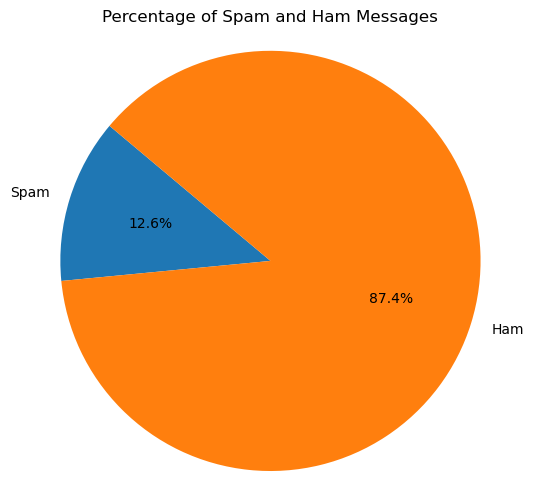

In [14]:
#counting the spam and ham
spam_count = df[df['Label'] == 'spam']['Label'].count()
ham_count = df[df['Label'] == 'ham']['Label'].count()

# Creating a list of counts and corresponding labels
counts = [spam_count, ham_count]
labels = ['Spam', 'Ham']

#Piechart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')

*As we can see from the piechart is that there are 12,6% of spam in this dataset wich is a lot

In [15]:
#i'm going to change the label column from categorical to numercial with encoder
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

In [16]:
df #showing the changed database

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


As we can see it changed!
* 0 = ham
* 1 = spam

*** CREATING FUNCTIONS ***

**1 Creating a function to extract important features from text

In [25]:
def get_importantFeatures(sent):
    sent = sent.lower()
    
    returnList = []
    sent = nltk.word_tokenize(sent)
    for i in sent:
        if i.isalnum():
            returnList.append(i)
    return returnList

**2 Removing punctuation and stop words for spam detection

In [28]:
def removing_stopWords(sent):
    returnList = []
    for i in sent:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            returnList.append(i)
    return returnList

**3 Using the Porter stemming function to process words with the same meaning

In [39]:
ps = PorterStemmer()
def potter_stem(sent):
    returnList = []
    for i in sent:
        returnList.append(ps.stem(i))
    return " ".join(returnList)

In [30]:
#Here we are applying these functions
df['imp_feature'] = df['EmailText'].apply(get_importantFeatures)

df['imp_feature'] = df['imp_feature'].apply(removing_stopWords)

df['imp_feature'] = df['imp_feature'].apply(potter_stem)

In [31]:
df #checking the new data that we are going to work on!

,Label,EmailText,imp_feature
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ã_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


**CREATING THE MODEL**

In [32]:
#train test split
from sklearn.model_selection import train_test_split
X = df['imp_feature']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [35]:
#Here, we will create our SVM model using the built-in Keras function
tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(X_train)
 
tuned_parameters = {'kernel':['linear','rbf'],'gamma':[1e-3,1e-4], 'C':[1,10,100,1000]}
 
model = GridSearchCV(svm.SVC(),tuned_parameters)
model.fit(feature, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

This code demonstrates how to create an SVM model using the built-in Keras function, with TF-IDF vectorization and grid cross-validation to tune the model's parameters. This approach helps in building an efficient classification model for the training data.

** Finally, we will make predictions. We used pickle to save our trained model

In [36]:
from sklearn.naive_bayes import MultinomialNB
import pickle

cv = CountVectorizer()
cv.fit(X_train)
X_train_transformed = cv.transform(X_train)
X_test_transformed = cv.transform(X_test)
model = MultinomialNB()
model.fit(X_train_transformed, y_train)
accuracy = model.score(X_test_transformed, y_test)
print("Accuracy:", accuracy)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb')) #great accuracy

Accuracy: 0.9767981438515081


Then, we use a Tkinter to create an interface

In [42]:
from tkinter import *
import tkinter as tk
 
spam_model = pickle.load(open("finalized_model.sav",'rb'))
 
def check_spam():
    text = spam_text_Entry.get()
    is_spam = spam_model.predict(tfidf.transform([text]))
    if is_spam == 1:
        print("text is spam")
        my_string_var.set("Result: text is spam")
    else:
        print("text is not spam")
        my_string_var.set("Result: text is not spam")
win = Tk()
 
win.geometry("400x600")
win.configure(background="pink")
win.title("Sms Spam Detector")
 
title = Label(win, text="SMS Spam Detector",
              bg="mistyrose",width="300",height="2",fg="Black",font=("Calibri 20 bold italic underline")).pack()
 
spam_text = Label(win, text="Enter your Text: ",bg="paleturquoise", font=("Verdana 12")).place(x=12,y=100)
spam_text_Entry = Entry(win, textvariable=spam_text,width=33)
spam_text_Entry.place(x=155, y=105)
 
my_string_var = StringVar()
my_string_var.set("Result: ")
 
print_spam = Label(win, textvariable=my_string_var,bg="paleturquoise", font=("Verdana 12")).place(x=12,y=200)
 
Button = Button(win, text="Submit",width="12",height="1",activebackground="red",
                bg="violet",command=check_spam,font=("Verdana 12")).place(x=12,y=150)
win.mainloop()

text is not spam
text is spam


**Example for spam: Free entry in 2 a wkly comp to win FA Cup final

**Example for ham : I HAVE A DATE ON SUNDAY WITH WILL!!    